In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context("talk")
sns.set_palette('Set2', 10)

So, yes, again, I'm trying to show a play-by-play analysis of the Israeli GTFS for SIRI archiving purposes we have at [hasadna/open-bus](https://github.com/hasadna/open-bus).

The agenda this time is: (again, you can skip to item 3 if you're just interested in the stats, or if you already read the previous post):
1. [Get up-to-date GTFS files from the MOT FTP server](#Get-the-data)
2. [Extract the needed info from them into pandas tidy DataFrames](#Tidy-it-up)
3. [One the next episodes](#On-the-next-episodes) Yep, not all is covered in this notebook
4. [Loops](#Loops)

On the pedagogical side, 

## Get the data
We get the data straight from MOT's ftp. Just so I don't repeat the last post, this went out to a separate module.

In [7]:
from gtfs_utils import *
LOCAL_ZIP_PATH = 'data/sample/gtfs_171218.zip' 

conn = ftp_connect()
ftp_dir = get_ftp_dir(conn)
UPTODATE = 90 #days
our_uptodateness = get_uptodateness(ftp_dir, local_zip_path = LOCAL_ZIP_PATH)

if our_uptodateness > UPTODATE:
    get_ftp_file(conn)
    get_ftp_file(conn, file_name = 'Tariff.zip', local_zip_path = 'data/sample/tariff.zip' )

conn.quit()

'221 Goodbye.'

We load MOT's tarrif.txt file, which will give us zone names and other local info.
Found out it's the file is even more fd-up than I realized, so I add the southern zones manualy

In [8]:
tariff_df = extract_tariff_df(local_zip_path = 'data/sample/tariff.zip')
south = [
    {
        'zone_name': 'מצפה רמון',
        'zone_id': '903'
    },
    {
        'zone_name': 'ערבה',
        'zone_id': '902'
    },
    {
        'zone_name': 'אילת',
        'zone_id': '901'
    },]
south = pd.DataFrame(south)
tariff_df = tariff_df.append(south)
tariff_df

,Daily,FromDate,Monthly,ShareCode,ToDate,Weekly,zone_id,zone_name
0,13.5,01/04/2016 00:00:00,213.0,141.0,01/01/2200 00:00:00,64.0,210,גוש דן
10,13.5,01/04/2016 00:00:00,149.0,152.0,01/01/2200 00:00:00,57.5,221,שרון
11,13.5,01/04/2016 00:00:00,149.0,153.0,01/01/2200 00:00:00,57.5,222,ראש העין שוהם
12,13.5,01/04/2016 00:00:00,149.0,154.0,01/01/2200 00:00:00,57.5,223,רחובות
13,13.5,01/04/2016 00:00:00,149.0,155.0,01/01/2200 00:00:00,57.5,231,נתניה
14,13.5,01/04/2016 00:00:00,149.0,156.0,01/01/2200 00:00:00,57.5,232,חבל מודיעין
15,13.5,01/04/2016 00:00:00,149.0,157.0,01/01/2200 00:00:00,57.5,233,אשדוד
16,9.5,01/04/2016 00:00:00,149.0,171.0,01/01/2200 00:00:00,42.5,410,באר שבע
24,13.5,01/04/2016 00:00:00,136.0,180.0,01/01/2200 00:00:00,39.5,421,רהט להבים
25,13.5,01/04/2016 00:00:00,136.0,181.0,01/01/2200 00:00:00,39.5,422,אופקים


## Tidy it up
Again I'm using [partridge](https://github.com/remix/partridge/tree/master/partridge) for filtering on dates, and then some tidying up and transformations.

In [ ]:
import partridge as ptg

service_ids_by_date = ptg.read_service_ids_by_date(LOCAL_ZIP_PATH)
service_ids = service_ids_by_date[datetime.date(2017, 12, 21)]

feed = ptg.feed(LOCAL_ZIP_PATH, view={
    'trips.txt': {
        'service_id': service_ids,
    },
})

In [6]:
def to_timedelta(df):
    '''
    Turn time columns into timedelta dtype
    '''
    cols = ['arrival_time', 'departure_time']
    numeric = df[cols].apply(pd.to_timedelta, unit='s')
    df = df.copy()
    df[cols] = numeric
    return df

In [7]:
s = feed.stops
r = feed.routes
t = (feed.trips
     .assign(route_id=lambda x: pd.Categorical(x['route_id'])))

In [6]:
f = (feed.stop_times[['trip_id', 'departure_time', 'arrival_time', 'stop_id', 'stop_sequence']]
     .assign(date = datetime.date(2017, 12, 21))
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'zone_id']], on='stop_id')
     # Much faster joins and slices with Categorical dtypes
     .merge(tariff_df[['zone_id', 'zone_name']], on='zone_id')
     .assign(zone_id=lambda x: pd.Categorical(x['zone_id']))
     .assign(zone_name=lambda x: pd.Categorical(x['zone_name']))
     .merge(t[['trip_id', 'route_id', 'direction_id']], on='trip_id')
     .merge(r[['route_id', 'route_short_name', 'route_long_name']], on='route_id')
     .assign(route_id=lambda x: pd.Categorical(x['route_id']))
     .pipe(to_timedelta)
    )
f.head()

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
0,28917380_191217,08:57:00,08:57:00,37312,1,2017-12-21,באר שבע מרכז,31.242886,34.798546,410,באר שבע,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
1,28917380_191217,09:04:00,09:04:00,37314,2,2017-12-21,באר שבע-צפון,31.262089,34.809287,410,באר שבע,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
2,28917380_191217,09:13:00,09:13:00,37308,3,2017-12-21,להבים רהט,31.369907,34.798040,421,רהט להבים,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
3,28917380_191217,09:29:00,09:29:00,37316,4,2017-12-21,קרית גת,31.603526,34.777955,802,קריית גת,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
4,28917380_191217,09:54:00,09:54:00,37336,5,2017-12-21,רמלה,31.928809,34.877304,210,גוש דן,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו


## On the next episodes
OK, enough for now, on the next posts: 

* TODO: Turn it all to day-of-week means
* TODO: some dynamic bokeh web applet to use this as a tool
* TODO: More geo visualizations
* TODO: More centrality measures
* TODO: Looped routes analysis

## Loops
I want to categorize routes with loops, so I give them 3 categories
1. *"soft-loops"* - only the origin and dest stops are the same
2. *"hard-loops"* - a loop within the route, a stop in the middle

### soft loops
TODO: I added `direction_id` to the groupby, need to check if this is needed


In [20]:
import pickle
import os

In [21]:
# again using a custom groupby aggregation function, this is VERY inefficient,
# but far more readable than doing some other magic, so I'm sticking to it for now

def apply_and_pickle(f, pkl_path, apply_func):
    if not os.path.exists(pkl_path):
        ret_df = f.groupby('trip_id').apply(apply_func)
        # since it's so inefficient I pickle it
        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(orig_dest_only, pkl_file)
    else:
        with open(pkl_path, 'rb') as pkl_file:
            ret_df = pickle.load(pkl_file)
        return ret_df

In [22]:
def first_last(df):
    return df.sort_values(by='stop_sequence').iloc[[0, -1]]
orig_dest_only = apply_and_pickle(f, 'softloop.pkl', first_last)

In [118]:
gr = orig_dest_only.groupby(['route_id', 'trip_id', 'stop_id', 'direction_id']).size()
r[r.route_id.isin(gr[gr>1].reset_index().groupby('route_id').trip_id.nunique().pipe(lambda x: x[x>0]).index)].shape

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'trip_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


(114, 7)

### All loops

In [86]:
gr = f.groupby(['route_id', 'trip_id', 'stop_id']).size()
gr[gr>1].reset_index().groupby('route_id').trip_id.nunique().pipe(lambda x: x[x>0]).shape

(644,)

### Hard loops
Divide this into two with first or with last.
#### With first

In [89]:
def first_to_before_last(df):
    return df.sort_values(by='stop_sequence').iloc[0:-1]

apply_and_pickle(f, 'hard_with_first.pkl', first_to_before_last)

In [106]:
gr = hard_with_first.groupby(['route_id', 'trip_id', 'stop_id']).size()
r[r.route_id.isin(gr[gr>1].reset_index().groupby('route_id').trip_id.nunique().pipe(lambda x: x[x>0]).index)]

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'trip_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color
22,12479,2,NaN,מודיעין מרכז-מודיעין מכבים רעות<->תל אביב מרכז...,26025-2-0,2,NaN
23,18899,2,NaN,תל אביב מרכז-תל אביב יפו<->מודיעין מרכז-מודיעי...,26025-1-2,2,NaN
28,20177,2,NaN,נהריה-נהריה<->מודיעין מרכז-מודיעין מכבים רעות,26050-1-23,2,NaN
29,20179,2,NaN,מודיעין מרכז-מודיעין מכבים רעות<->נהריה-נהריה,26050-2-20,2,NaN
30,20180,2,NaN,נהריה-נהריה<->מודיעין מרכז-מודיעין מכבים רעות,26050-1-24,2,NaN
31,20182,2,NaN,נהריה-נהריה<->מודיעין מרכז-מודיעין מכבים רעות,26050-1-25,2,NaN
35,20953,2,NaN,מודיעין מרכז-מודיעין מכבים רעות<->נהריה-נהריה,26050-2-24,2,NaN
36,20954,2,NaN,נהריה-נהריה<->מודיעין מרכז-מודיעין מכבים רעות,26050-1-28,2,NaN
37,20955,2,NaN,מודיעין מרכז-מודיעין מכבים רעות<->נהריה-נהריה,26050-2-25,2,NaN
38,20956,2,NaN,מודיעין מרכז-מודיעין מכבים רעות<->נהריה-נהריה,26050-2-26,2,NaN


#### With last

In [91]:
def second_to_last(df):
    return df.sort_values(by='stop_sequence').iloc[1:]

apply_and_pickle(f, 'hard_with_last.pkl', second_to_last)

In [93]:
gr = hard_with_last.groupby(['route_id', 'trip_id', 'stop_id']).size()
gr[gr>1].reset_index().groupby('route_id').trip_id.nunique().pipe(lambda x: x[x>0]).shape

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'trip_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


(543,)

#### No origin and dest, only middle stops

In [99]:
def middle(df):
    return df.sort_values(by='stop_sequence').iloc[1:-1]

apply_and_pickle(f, 'middle.pkl', middle)

In [100]:
gr = hard_with_last.groupby(['route_id', 'trip_id', 'stop_id']).size()
gr[gr>1].reset_index().groupby('route_id').trip_id.nunique().pipe(lambda x: x[x>0]).shape

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'trip_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


(543,)

### Loops think-over
http://gtfs.org/best-practices/, two definitions relevant to our review today - **Loop routes** and **Lasso Routes**.

Start by finding all routes that actually pass through the SAME stop.

In [44]:
stop_seq_counts = f.groupby(['trip_id', 'route_id', 'stop_id']).stop_sequence.nunique()
looped_routes = stop_seq_counts[stop_seq_counts>1].reset_index().groupby('route_id').size()
looped_routes = looped_routes[looped_routes>0]
looped_routes = r[r.route_id.isin(looped_routes.index)]
looped_routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color
167,3575,3,6,קיבוץ גלויות/הקטר-חיפה<->קיבוץ גלויות/הקטר-חיפ...,10006-3-#,3,NaN
174,3600,3,10,חסן שוקרי/הנביאים-חיפה<->חסן שוקרי/הנביאים-חיפ...,10010-3-#,3,NaN
175,3601,3,11,גיבורי התהילה/בית קמה-כפר חסידים א'<->גיבורי ה...,10011-3-#,3,NaN
207,3662,3,20,ערד/סובה-חיפה<->ערד/סובה-חיפה-3#,10020-3-#,3,NaN
225,19615,3,29,תחנה מרכזית חוף כרמל/רציפים עירוני-חיפה<->תחנה...,10029-3-#,3,NaN


### A route I know - 23

In [50]:
r[(r.route_short_name=='23') & (r.agency_id=='5')]


,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color
2997,2358,5,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10,17023-1-0,3,NaN
2998,2359,5,23,רכבת השלום/גבעת התחמושת-תל אביב יפו<->אורט סינ...,17023-1-1,3,NaN


In [98]:
s.parent_station.value_counts().head(10).index

Index(['26652', '12961', '10758', '21658', '14679', '3871', '17592', '37412',
       '4967', '15437'],
      dtype='object')

There's an issue with parent stations missing from the partridge feed, posted an issue on it https://github.com/remix/partridge/issues/20

In [101]:
s[s.stop_id.isin(s.parent_station.value_counts().head(10).index)]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,zone_id


In [75]:
with pd.option_context('display.max_rows', None):
    display(f[f.route_id.isin(['2358', '2359'])].sort_values(by=['trip_id','departure_time']))

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
539195,29761863_171217,05:50:00,05:50:00,14357,1,2017-12-21,כרמלית,32.067172,34.765204,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539215,29761863_171217,05:50:50,05:50:50,13481,2,2017-12-21,יצחק אלחנן/הכרמל,32.065429,34.765684,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539216,29761863_171217,05:53:05,05:53:05,13089,3,2017-12-21,מגדל שלום/אחד העם,32.063639,34.770359,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539199,29761863_171217,05:55:12,05:55:12,13294,4,2017-12-21,אלנבי/מונטיפיורי,32.065866,34.772034,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539200,29761863_171217,05:56:35,05:56:35,13315,5,2017-12-21,שוק הכרמל/אלנבי,32.068872,34.770828,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539221,29761863_171217,05:57:46,05:57:46,13547,6,2017-12-21,שיינקין/יוחנן הסנדלר,32.069172,34.773500,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539222,29761863_171217,05:58:28,05:58:28,13571,7,2017-12-21,שיינקין/פיארברג,32.068444,34.776696,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539197,29761863_171217,05:59:20,05:59:20,13228,8,2017-12-21,שד' רוטשילד/שיינקין,32.068653,34.778387,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539223,29761863_171217,06:01:19,06:01:19,12998,9,2017-12-21,החשמונאים/יהודה הלוי,32.069677,34.781765,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10
539191,29761863_171217,06:02:03,06:02:03,13226,10,2017-12-21,החשמונאים/קרליבך,32.069473,34.783647,210,גוש דן,2358,0,23,כרמלית-תל אביב יפו<->כרמלית-תל אביב יפו-10


In [56]:
f[f.route_id.isin(['2358', '2359'])].groupby('route_id').size().pipe(lambda s: s[s>0])

route_id
2358    2862
2359      10
dtype: int64

In [72]:
with pd.option_context('display.max_rows', None):
    display(r[(r.route_long_name.str.contains('כרמלית')) & (r.agency_id=='5')].head(100))

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color
2787,2691,5,119,אבי האסירים-ראשון לציון<->הכובשים/כרמלית-תל אב...,11119-1-0,3,NaN
2788,2692,5,119,הכובשים/כרמלית-תל אביב יפו<->אבי האסירים-ראשון...,11119-2-0,3,NaN
2789,11818,5,119,אבי האסירים-ראשון לציון<->הכובשים/כרמלית-תל אב...,11119-1-1,3,NaN
2796,2724,5,150,חובבי ציון/מונטיפיורי-פתח תקווה<->כרמלית-תל אב...,11150-1-0,3,NaN
2801,10262,5,220,עתידים-תל אביב יפו<->כרמלית-תל אביב יפו-10,11220-1-0,3,NaN
2802,10263,5,220,מסוף כרמלית-תל אביב יפו<->עתידים-תל אביב יפו-20,11220-2-0,3,NaN
2899,9806,5,161,כרמלית-תל אביב יפו<->עמידר ר''ג-רמת גן-10,12161-1-0,3,NaN
2900,9807,5,161,עמידר ר''ג-רמת גן<->כרמלית-תל אביב יפו-20,12161-2-0,3,NaN
2904,17826,5,238,דרך מנחם בגין-קופת חולים-פתח תקווה<->כרמלית-תל...,12238-1-0,3,NaN
2905,17827,5,238,כרמלית-תל אביב יפו<->דרך מנחם בגין-קופת חולים-...,12238-2-0,3,NaN


### How many final stops?
An important parameter we have to be familiar with is trip final stops. Our current best polling strategy 

#### One (wrong) way
not good, stop sequence sometimes starts with two, should check this out another time

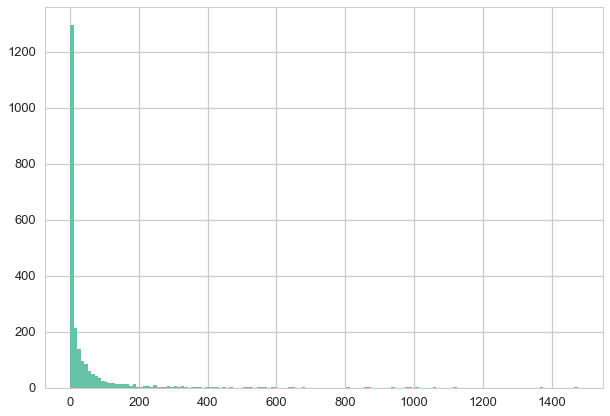

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_yticks(np.arange(32)*50)
orig_dest_only[orig_dest_only.stop_sequence!=1].groupby('stop_id').size().sort_values(ascending=False).hist(bins=147, ax=ax)

In [23]:
orig_dest_only[orig_dest_only.stop_sequence!=1].groupby('stop_id').size().sum()

92384

In [55]:
t.shape

(89777, 6)

We can see there's actually more last stops than trips, which means we're taking more than one, because of the sequence_number starting with two mentioned above.

Or shown differently:

In [25]:
f[f.stop_sequence==1].shape

(89105, 15)

672 trips have no stop with stop_sequence==1

#### Better yet


In [28]:
idx = f.groupby(['trip_id'], sort=False)['arrival_time'].transform(max) == f['arrival_time']
f[idx].sort_values(by='trip_id')

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
3226900,10096398_171217,0 days 22:05:22,0 days 22:05:22,34503,37,2017-12-21,אוניברסיטת אריאל/כביש 31,32.105926,35.210692,234,השומרון,9735,1,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...
3226937,10096399_171217,1 days 00:05:22,1 days 00:05:22,34503,37,2017-12-21,אוניברסיטת אריאל/כביש 31,32.105926,35.210692,234,השומרון,9735,1,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...
3227555,10221383_171217,0 days 15:21:28,0 days 15:21:28,34654,16,2017-12-21,קופת חולים לאומית/דרך הנחשונים,32.105873,35.171849,234,השומרון,9194,1,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...
3227571,10221384_171217,0 days 16:26:28,0 days 16:26:28,34654,16,2017-12-21,קופת חולים לאומית/דרך הנחשונים,32.105873,35.171849,234,השומרון,9194,1,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...
973521,10230038_171217,0 days 16:26:40,0 days 16:26:40,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.017810,232,חבל מודיעין,11169,1,101,מסוף 2000-תל אביב יפו<->בריכה/עמק דותן-מודיעין...
973520,10230038_171217,0 days 16:26:40,0 days 16:26:40,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.017810,232,חבל מודיעין,11169,1,101,מסוף 2000-תל אביב יפו<->בריכה/עמק דותן-מודיעין...
560116,10232240_171217,0 days 15:40:38,0 days 15:40:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
560117,10232240_171217,0 days 15:40:38,0 days 15:40:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
560143,10232241_171217,0 days 15:55:38,0 days 15:55:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
560142,10232241_171217,0 days 15:55:38,0 days 15:55:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...


In [29]:
f[idx].shape

(92212, 15)

Looks like there's duplicate trips also :(

In [32]:
st = feed.stop_times
st[((st.trip_id=='10230038_171217') & (st.stop_sequence==31)) ]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
15098671,10230038_171217,59200.0,59200.0,22173,31,1.0,0,44754


In [33]:
f[((f.trip_id=='10230038_171217') & (f.stop_sequence==31)) ]

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
973520,10230038_171217,16:26:40,16:26:40,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.01781,232,חבל מודיעין,11169,1,101,מסוף 2000-תל אביב יפו<->בריכה/עמק דותן-מודיעין...
973521,10230038_171217,16:26:40,16:26:40,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.01781,232,חבל מודיעין,11169,1,101,מסוף 2000-תל אביב יפו<->בריכה/עמק דותן-מודיעין...


Ok, that looks better, this problem is only in my `f` feed merged data frame, not in the original `stop_times.txt`.

I debug `f`'s creation to see 

In [35]:
ftest = (feed.stop_times[['trip_id', 'departure_time', 'arrival_time', 'stop_id', 'stop_sequence']]
     .assign(date = datetime.date(2017, 12, 21))
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'zone_id']], on='stop_id')
      # Much faster joins and slices with Categorical dtypes
     .merge(tariff_df[['zone_id', 'zone_name']], on='zone_id')

    )
ftest[ ((ftest.trip_id=='10230038_171217') & (ftest.stop_sequence==31)) ]

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name
2557765,10230038_171217,59200.0,59200.0,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.01781,232,חבל מודיעין
2557766,10230038_171217,59200.0,59200.0,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.01781,232,חבל מודיעין


In [37]:
tariff_df[tariff_df.zone_id=='232']

,Daily,FromDate,Monthly,ShareCode,ToDate,Weekly,zone_id,zone_name
14,13.5,01/04/2016 00:00:00,149.0,156.0,01/01/2200 00:00:00,57.5,232,חבל מודיעין
57,13.5,01/04/2016 00:00:00,149.0,697.0,01/01/2200 00:00:00,57.5,232,חבל מודיעין


Got it! Source of all evil, the messy tariff file where we get the zone names from.

In [47]:
tariff_df.groupby(['zone_id', 'zone_name']).size()

zone_id  zone_name                
110      סובב ירושלים                 1
121      הרי ירושלים                  1
122      בנימין                       1
123      גוש עציון                    1
131      אזור בית שמש                 1
133      בקעת ים המלח                 1
134      אזור קריית ארבע              1
135      גוש שילה ובקעה               1
210      גוש דן                       1
221      שרון                         1
222      ראש העין שוהם                1
223      רחובות                       1
231      נתניה                        1
232      חבל מודיעין                  2
233      אשדוד                        1
234      השומרון                      1
310      סובב חיפה                    1
321      עכו                          1
322      יוקנעם- טבעון                1
331      נהריה                        1
332      כרמיאל                       1
333      נצרת                         1
334      זכרון                        1
410      באר שבע                      1
421  

Only Modiin is problematic...

In [48]:
ftry = (feed.stop_times[['trip_id', 'departure_time', 'arrival_time', 'stop_id', 'stop_sequence']]
     .assign(date = datetime.date(2017, 12, 21))
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'zone_id']], on='stop_id')
      # Much faster joins and slices with Categorical dtypes
     .merge(tariff_df.groupby(['zone_id', 'zone_name']).size().reset_index()[['zone_id', 'zone_name']], on='zone_id')
    )
ftry [ ((ftry.trip_id=='10230038_171217') & (ftry.stop_sequence==31)) ]

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name
2493834,10230038_171217,59200.0,59200.0,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.01781,232,חבל מודיעין


In [8]:
f = (feed.stop_times[['trip_id', 'departure_time', 'arrival_time', 'stop_id', 'stop_sequence']]
     .assign(date = datetime.date(2017, 12, 21))
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'zone_id']], on='stop_id')
     # Much faster joins and slices with Categorical dtypes
     .merge(tariff_df.groupby(['zone_id', 'zone_name']).size().reset_index()[['zone_id', 'zone_name']], on='zone_id')
     .assign(zone_id=lambda x: pd.Categorical(x['zone_id']))
     .assign(zone_name=lambda x: pd.Categorical(x['zone_name']))
     .merge(t[['trip_id', 'route_id', 'direction_id']], on='trip_id')
     .merge(r[['route_id', 'route_short_name', 'route_long_name']], on='route_id')
     .assign(route_id=lambda x: pd.Categorical(x['route_id']))
     .pipe(to_timedelta)
    )
f.head()

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
0,28917380_191217,08:57:00,08:57:00,37312,1,2017-12-21,באר שבע מרכז,31.242886,34.798546,410,באר שבע,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
1,28917380_191217,09:04:00,09:04:00,37314,2,2017-12-21,באר שבע-צפון,31.262089,34.809287,410,באר שבע,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
2,28917380_191217,09:13:00,09:13:00,37308,3,2017-12-21,להבים רהט,31.369907,34.798040,421,רהט להבים,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
3,28917380_191217,09:29:00,09:29:00,37316,4,2017-12-21,קרית גת,31.603526,34.777955,802,קריית גת,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו
4,28917380_191217,09:54:00,09:54:00,37336,5,2017-12-21,רמלה,31.928809,34.877304,210,גוש דן,20950,1,NaN,באר שבע מרכז-באר שבע<->תל אביב מרכז-תל אביב יפו


In [9]:
idx = f.groupby(['trip_id'], sort=False)['arrival_time'].transform(max) == f['arrival_time']
f[idx].sort_values(by='trip_id')

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,date,stop_name,stop_lat,stop_lon,zone_id,zone_name,route_id,direction_id,route_short_name,route_long_name
3144684,10096398_171217,0 days 22:05:22,0 days 22:05:22,34503,37,2017-12-21,אוניברסיטת אריאל/כביש 31,32.105926,35.210692,234,השומרון,9735,1,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...
3144721,10096399_171217,1 days 00:05:22,1 days 00:05:22,34503,37,2017-12-21,אוניברסיטת אריאל/כביש 31,32.105926,35.210692,234,השומרון,9735,1,70,קניון קרני שומרון-קרני שומרון<->אוניברסיטת ארי...
3145339,10221383_171217,0 days 15:21:28,0 days 15:21:28,34654,16,2017-12-21,קופת חולים לאומית/דרך הנחשונים,32.105873,35.171849,234,השומרון,9194,1,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...
3145355,10221384_171217,0 days 16:26:28,0 days 16:26:28,34654,16,2017-12-21,קופת חולים לאומית/דרך הנחשונים,32.105873,35.171849,234,השומרון,9194,1,102,קופת חולים כללית-ברכה<->קופת חולים לאומית/דרך ...
966190,10230038_171217,0 days 16:26:40,0 days 16:26:40,22173,31,2017-12-21,בריכה/עמק דותן,31.899377,35.017810,232,חבל מודיעין,11169,1,101,מסוף 2000-תל אביב יפו<->בריכה/עמק דותן-מודיעין...
559439,10232240_171217,0 days 15:40:38,0 days 15:40:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
559457,10232241_171217,0 days 15:55:38,0 days 15:55:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
559475,10232242_171217,0 days 16:15:38,0 days 16:15:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
559493,10232243_171217,0 days 16:25:38,0 days 16:25:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...
559511,10232244_171217,0 days 16:40:38,0 days 16:40:38,24713,18,2017-12-21,תחנת רכבת מרכז,31.900996,35.005017,232,חבל מודיעין,11200,1,112,מסוף 2000-תל אביב יפו<->תחנה מרכזית/הורדה-מודי...


In [10]:
f[idx].shape

(89768, 15)

now we're missing 9. hmmmm... 

Lets see which ones we're missing.

In [ ]:
t = t.set_index('trip_id')

In [19]:
missing_trips = t[~t.index.isin(f.trip_id)]
missing_trips

,route_id,service_id,trip_headsign,direction_id,shape_id
trip_id,,,,,
30277345_211217,8630,54178129,מודיעין עילית _ מרכז,1,NaN
30277344_211217,8630,54178129,מודיעין עילית _ מרכז,1,NaN
30277772_211217,8647,54178161,NaN,1,NaN
30277770_211217,8647,54178161,NaN,1,NaN
30278247_211217,8664,54178172,מודיעין עילית _ אחוזת ברכפלד,1,NaN
30278261_211217,8664,54178172,מודיעין עילית _ אחוזת ברכפלד,1,NaN
30278540_211217,8678,54178210,בני ברק _ מרכז,0,NaN
30278718_211217,8681,54178238,מודיעין עילית _ נאות הפסגה,1,63594
30278717_211217,8681,54178238,מודיעין עילית _ נאות הפסגה,1,63594


Maybe they don't have stop times?

In [29]:
feed.stop_times[feed.stop_times.trip_id.isin(missing_trips.index)]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled


To be safe lets test we are getting stop_times from the same line with different trips

In [24]:
test_trips = t.head()
test_trips

,route_id,service_id,trip_headsign,direction_id,shape_id
trip_id,,,,,
30179315_211217,20444,54163484,יהוד מונוסון _ דרך העצמאות,0,82704
30179316_211217,20444,54163484,יהוד מונוסון _ דרך העצמאות,0,82704
30180186_211217,20354,54163559,יהוד מונוסון _ דרך העצמאות,1,82455
30180187_211217,20354,54163559,יהוד מונוסון _ דרך העצמאות,1,82455
30180188_211217,20354,54163559,יהוד מונוסון _ דרך העצמאות,1,82455


In [32]:
feed.stop_times[feed.stop_times.trip_id.isin(test_trips.index)]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
14618361,30179315_211217,3600.0,3600.0,13284,1,0.0,1,0
14618362,30179315_211217,3722.0,3722.0,14564,2,0.0,0,589
14618363,30179315_211217,3771.0,3771.0,13317,3,0.0,0,959
14618364,30179315_211217,3876.0,3876.0,12882,4,0.0,0,1353
14618365,30179315_211217,3988.0,3988.0,12896,5,0.0,0,1900
14618366,30179315_211217,4075.0,4075.0,13679,6,0.0,0,2335
14618367,30179315_211217,4178.0,4178.0,13127,7,0.0,0,2741
14618368,30179315_211217,4254.0,4254.0,12858,8,0.0,0,3173
14618369,30179315_211217,4308.0,4308.0,13634,9,0.0,0,3449
14618370,30179315_211217,4408.0,4408.0,14338,10,0.0,0,3816


Woohoo! looks like we're good to go. 

See you next time with the GTFS best practices on looped lines